<a href="https://colab.research.google.com/github/prabhatkumar3918/Task-1/blob/Task-1/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

<Axes: xlabel='gender', ylabel='count'>

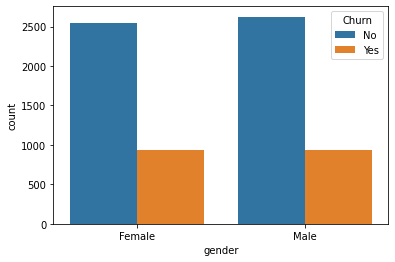

In [5]:
sns.countplot(data=df, x="gender", hue="Churn")

OBSERVATION::Around 800 male and female have opted for no service

<Axes: xlabel='SeniorCitizen', ylabel='count'>

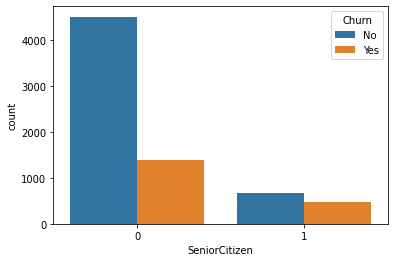

In [6]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")

OBSERVATION::More number of Youngester have opted for no services

<Axes: xlabel='gender', ylabel='count'>

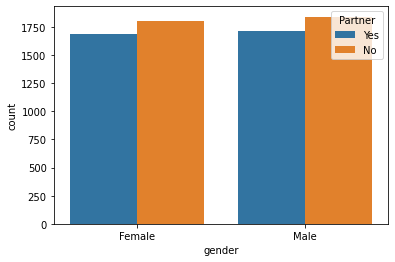

In [7]:
sns.countplot(data=df, x="gender", hue="Partner")

Observation::no of people who are partner < no of people who are not partner

<Axes: xlabel='Partner', ylabel='count'>

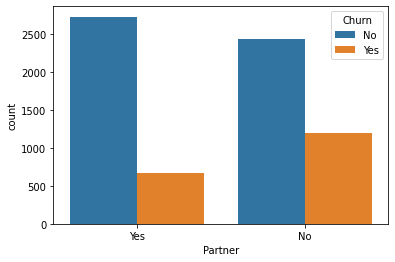

In [8]:
sns.countplot(data=df, x="Partner", hue="Churn")

Observation::Partners are less willing to opt for no services whereas the number is high for one who is not partner.



<Axes: xlabel='InternetService', ylabel='count'>

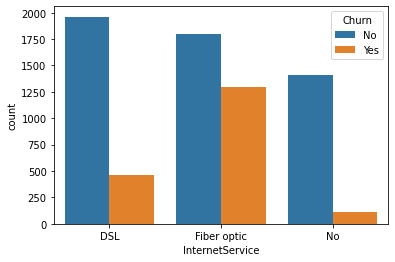

In [9]:
sns.countplot(data=df, x="InternetService", hue="Churn")

OBSERVATION::One who has opted for Fiber optic InternetService is more willing to leave the company's service

<Axes: xlabel='Dependents', ylabel='count'>

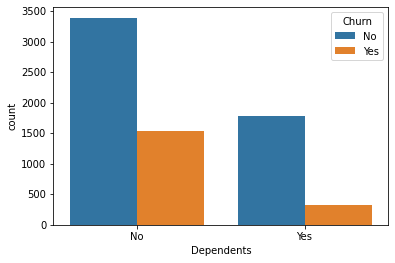

In [10]:
sns.countplot(data=df, x="Dependents", hue="Churn")

OBSERVATION::One who is not dependent is more willing to leave te service

<Axes: xlabel='PhoneService', ylabel='count'>

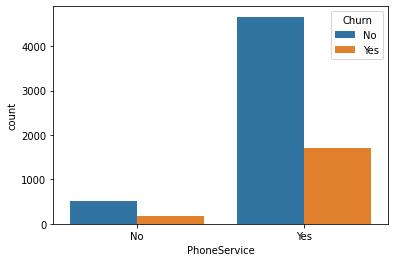

In [11]:
sns.countplot(data=df, x="PhoneService", hue="Churn")

<Axes: xlabel='OnlineSecurity', ylabel='count'>

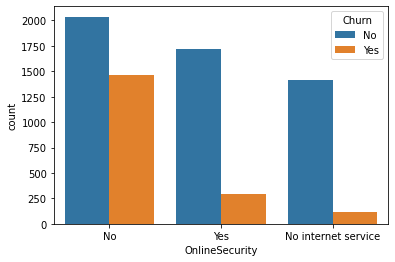

In [12]:
sns.countplot(data=df, x="OnlineSecurity", hue="Churn")

<Axes: xlabel='MultipleLines', ylabel='count'>

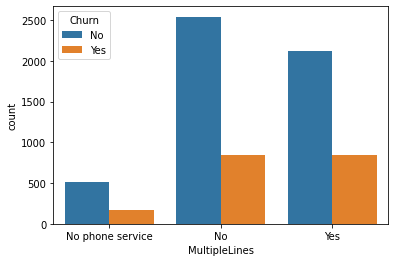

In [13]:
sns.countplot(data=df, x="MultipleLines", hue="Churn")

<Axes: xlabel='DeviceProtection', ylabel='count'>

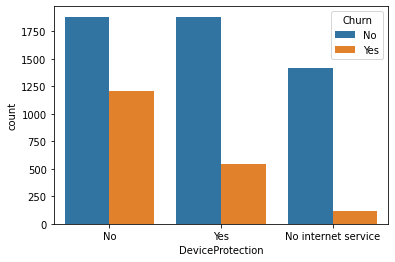

In [14]:
sns.countplot(data=df, x="DeviceProtection", hue="Churn")

<Axes: xlabel='OnlineBackup', ylabel='count'>

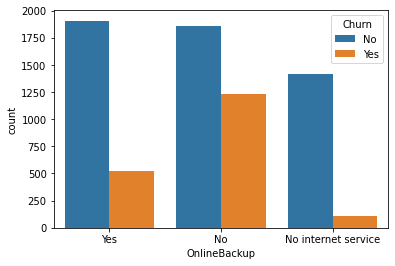

In [15]:
sns.countplot(data=df, x="OnlineBackup", hue="Churn")

<Axes: xlabel='TechSupport', ylabel='count'>

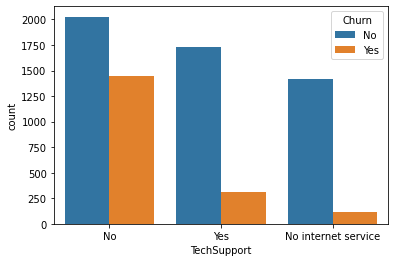

In [16]:
sns.countplot(data=df, x="TechSupport", hue="Churn")

<Axes: xlabel='Contract', ylabel='count'>

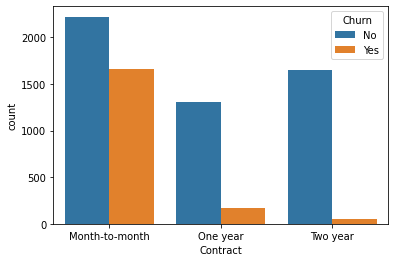

In [17]:
sns.countplot(data=df, x="Contract", hue="Churn")

<Axes: xlabel='PaperlessBilling', ylabel='count'>

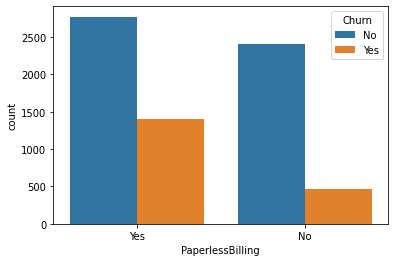

In [18]:
sns.countplot(data=df, x="PaperlessBilling", hue="Churn")

<Axes: xlabel='PaperlessBilling', ylabel='count'>

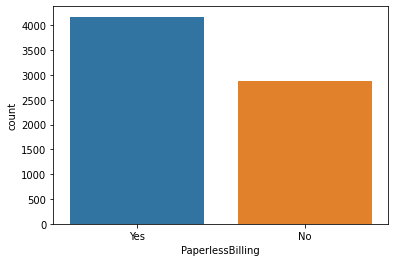

In [19]:
sns.countplot(data=df, x="PaperlessBilling")

<Axes: xlabel='PaymentMethod', ylabel='count'>

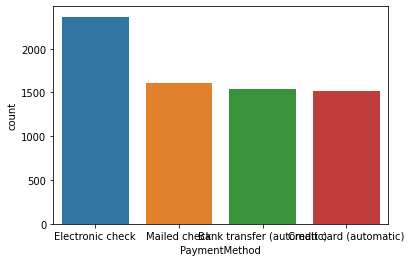

In [20]:
sns.countplot(data=df, x="PaymentMethod")

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

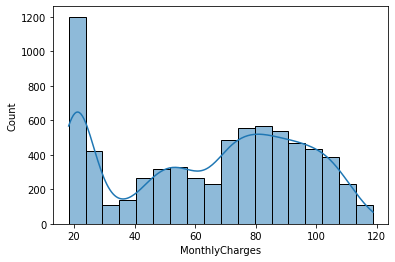

In [21]:
sns.histplot(data=df, x="MonthlyCharges",kde=True)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

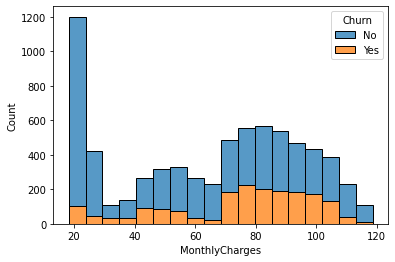

In [22]:
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack")

In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [24]:
X=df.copy()

In [25]:
X.drop(['customerID','TotalCharges'],axis=1,inplace=True)

In [26]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in X.columns:
    if X[col].dtype == np.number:
        continue 
    else:
        X[col] = le.fit_transform(X[col])

In [29]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [30]:
y=X['Churn']
X.drop('Churn',axis=1,inplace=True)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape

(4930, 18)

In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
#initializing neural network
classifier=Sequential()

In [46]:
#adding the input layer,first hidden layer and second hidden layer
classifier.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=18))
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=5,kernel_initializer='he_uniform',activation='relu'))

In [47]:
#Adding Output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [48]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
331/331 [==============================] - 3s 3ms/step - loss: 0.6646 - accuracy: 0.7914 - val_loss: 0.6381 - val_accuracy: 0.7972
Epoch 2/10
331/331 [==============================] - 1s 3ms/step - loss: 0.6078 - accuracy: 0.7875 - val_loss: 0.5774 - val_accuracy: 0.7953
Epoch 3/10
331/331 [==============================] - 1s 3ms/step - loss: 0.5479 - accuracy: 0.7884 - val_loss: 0.5223 - val_accuracy: 0.8076
Epoch 4/10
331/331 [==============================] - 1s 3ms/step - loss: 0.4978 - accuracy: 0.8047 - val_loss: 0.4852 - val_accuracy: 0.8009
Epoch 5/10
331/331 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.8102 - val_loss: 0.4634 - val_accuracy: 0.8033
Epoch 6/10
331/331 [==============================] - 1s 3ms/step - loss: 0.4458 - accuracy: 0.8059 - val_loss: 0.4510 - val_accuracy: 0.7978
Epoch 7/10
331/331 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.8105 - val_loss: 0.4451 - val_accuracy: 0.7972
Epoch 

In [50]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

67/67 [==============================] - 0s 1ms/step


In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1325  214]
 [ 225  349]]


In [52]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.792238523426408
